In [63]:
# Libraries

import pandas as pd # For Data Manipulation
import numpy as np # For n-dimension arrays
from scipy import stats # For math computational works

import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

In [64]:
# LOad the data
file_path = 'Student_performance_data.csv'

student_data = pd.read_csv(file_path, header=0)

student_data_original = student_data.copy()

In [65]:
# Print the top rows of the data

student_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Aisan,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F


### Data Pre-processing

In [66]:
# Remove the studentId as it's of no use for us
student_data.drop(columns=['StudentID'], inplace=True)

student_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,15,Male,Aisan,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F


In [67]:
categorical_data = student_data.drop(columns=['StudyTimeWeekly', 'Absences', 'GPA'])
categorical_columns = categorical_data.columns

In [68]:
categorical_columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GradeClass'],
      dtype='object')

## Handling the Categorical data :
-----------------

* We could use the **Label encoder** for doing this. But here we are manually doing it.
* It is been done by assigning values manually to the specific categories.

* We are not touching the 'Age' column as it is already in the numerical type.
* Let's start from **Gender** column :
    * Male -> 0
    * Female -> 1

In [69]:
values_for_gender = {'Male' : 0,
                    'Female' : 1}

student_data.Gender.replace(values_for_gender, inplace=True)
student_data.Gender.head()

0    1
1    0
2    0
3    1
4    1
Name: Gender, dtype: int64

* Now it's time for the **Ethnicity** column

In [70]:
student_data.Ethnicity.unique()

array(['Caucasian', 'Aisan', 'African American', 'Other'], dtype=object)

'Caucasian' -> 0

'Aisan' -> 1

'African American' -> 2

'Other' -> 3

In [71]:
values_for_Ethnicity = {
    'Caucasian': 0,
    'Asian': 1,
    'African American': 2,
    'Other': 3
}

# Ensure correct data type and clean the column
student_data['Ethnicity'] = student_data['Ethnicity'].astype(str).str.strip()
student_data['Ethnicity'].fillna('Other', inplace=True)

# Handle unexpected values
student_data.loc[~student_data['Ethnicity'].isin(values_for_Ethnicity.keys()), 'Ethnicity'] = 'Other'

# Apply replacement
student_data['Ethnicity'] = student_data['Ethnicity'].replace(values_for_Ethnicity)
print(student_data['Ethnicity'].head())


0    0
1    0
2    3
3    0
4    0
Name: Ethnicity, dtype: int64


* **ParentalEducation**

In [72]:
student_data.ParentalEducation.unique()

array(['Some College', 'High School', "Bachelor's", "Master's",
       'No Education'], dtype=object)

No Education -> 0

Some College -> 1

High School -> 2

Bachelor's -> 3

Master's -> 4

In [73]:
values_for_ParentalEducation = {
    "No Education": 0,
    "Some College": 1,
    "High School": 2,
    "Bachelor's": 3,
    "Master's": 4
}

# Clean data
student_data['ParentalEducation'] = student_data['ParentalEducation'].astype(str).str.strip()
student_data['ParentalEducation'].fillna('No Education', inplace=True)

# Handle unexpected values
unexpected_values = student_data[~student_data['ParentalEducation'].isin(values_for_ParentalEducation.keys())]
print("Unexpected Values:\n", unexpected_values)

# Assign default for unexpected values
student_data.loc[~student_data['ParentalEducation'].isin(values_for_ParentalEducation.keys()), 'ParentalEducation'] = 'No Education'

# Replace values
student_data['ParentalEducation'] = student_data['ParentalEducation'].replace(values_for_ParentalEducation)
print(student_data['ParentalEducation'].head())


Unexpected Values:
 Empty DataFrame
Columns: [Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []
0    1
1    2
2    3
3    3
4    1
Name: ParentalEducation, dtype: int64


* **Tutoring, Extracurricular, Sports, Music, Volunteering**

All these columns contains only **yes** and **no**.

Yes -> 1
No -> 0

In [74]:
values_for_yesNo = {
    'No' : 0,
    'Yes' : 1
}

student_data.replace(values_for_yesNo, inplace=True)

student_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,1,19.833723,7,1,Moderate,0,0,1,0,2.929196,C
1,18,0,0,2,15.408756,0,0,Low,0,0,0,0,3.042915,B
2,15,0,3,3,4.210570,26,0,Moderate,0,0,0,0,0.112602,F
3,17,1,0,3,10.028829,14,0,High,1,0,0,0,2.054218,D
4,17,1,0,1,4.672495,17,1,High,0,0,0,0,1.288061,F


* **ParentalSupport**

In [75]:
student_data.ParentalSupport.unique()

array(['Moderate', 'Low', 'High', 'Very High', 'No Support'], dtype=object)

No Support -> 0

Low -> 1

Moderate -> 2

High -> 3

Very High -> 4

In [76]:
values_for_ParentalSupport = {
    'No Support' : 0,
    'Low' : 1,
    'Moderate' : 2,
    'High' : 3,
    'Very High' : 4
}

student_data.ParentalSupport.replace(values_for_ParentalSupport, inplace=True)

student_data.ParentalSupport.head()

0    2
1    1
2    2
3    3
4    3
Name: ParentalSupport, dtype: int64

* **Grade** :
    For this column, we'll be using the **Label Encoder**, because with this we can even do the **inverse_transform** for the predicted values.

In [77]:
from sklearn.preprocessing import LabelEncoder

leGrade = LabelEncoder()

In [78]:
student_data['GradeClass'] = leGrade.fit_transform(student_data['GradeClass'])

student_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,1,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,2,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,3,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,1,4.672495,17,1,3,0,0,0,0,1.288061,4


Now if you look at the dataframe, all the column are in numeric values.

Now let's check for any null values

In [79]:
student_data.isnull().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

We don't have any null values.

#### Since we have so many categorical columns in our data, let's do count plots of how many instances we find each cateorical variable

In [80]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axs = ax.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=student_data, x=column, ax=axs[i], palette='flare')
    axs[i].set_title(f'Count Plot for {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')
    
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])
    
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

**GPA** column contains continous values based on which our **Grades** will be decided. Let's run *simple linear regression* to get a sense of what kind of effect thse feature have on academic performance in general. 
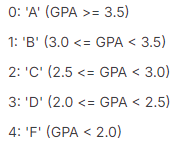

For regression, we'll be using the continuous variables (`StudyTimeWeekly`, `Absences`) and non-binary categorical variables (`ParentalEducation`, `ParentalSupport`) to predict **GPA**

It is understood that the categorical variables are not necessarily appropriate for the purpose of linear regressions, but it is insightful to see how these variables affect acadmeic performance anyway

In [ ]:
# Build a Linear Regresssion model
import statsmodels.api as sm

y=student_data.GPA
X = student_data[['ParentalEducation', 'Absences', 'StudyTimeWeekly', 'ParentalSupport']]
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

Model saved as student_performance_model.pkl
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     8576.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:38:24   Log-Likelihood:                -232.36
No. Observations:                2392   AIC:                             472.7
Df Residuals:                    2388   BIC:                             495.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

From our regression results, we can see that absences have the most clear statistical relationship with the data, which can be seen clearly by the visualizations below. For every absence, we expect a student's GPA to drop by .0996 on average. Weekly study time and parental support appear to have a positive effect on GPA, though not as clearly as absences

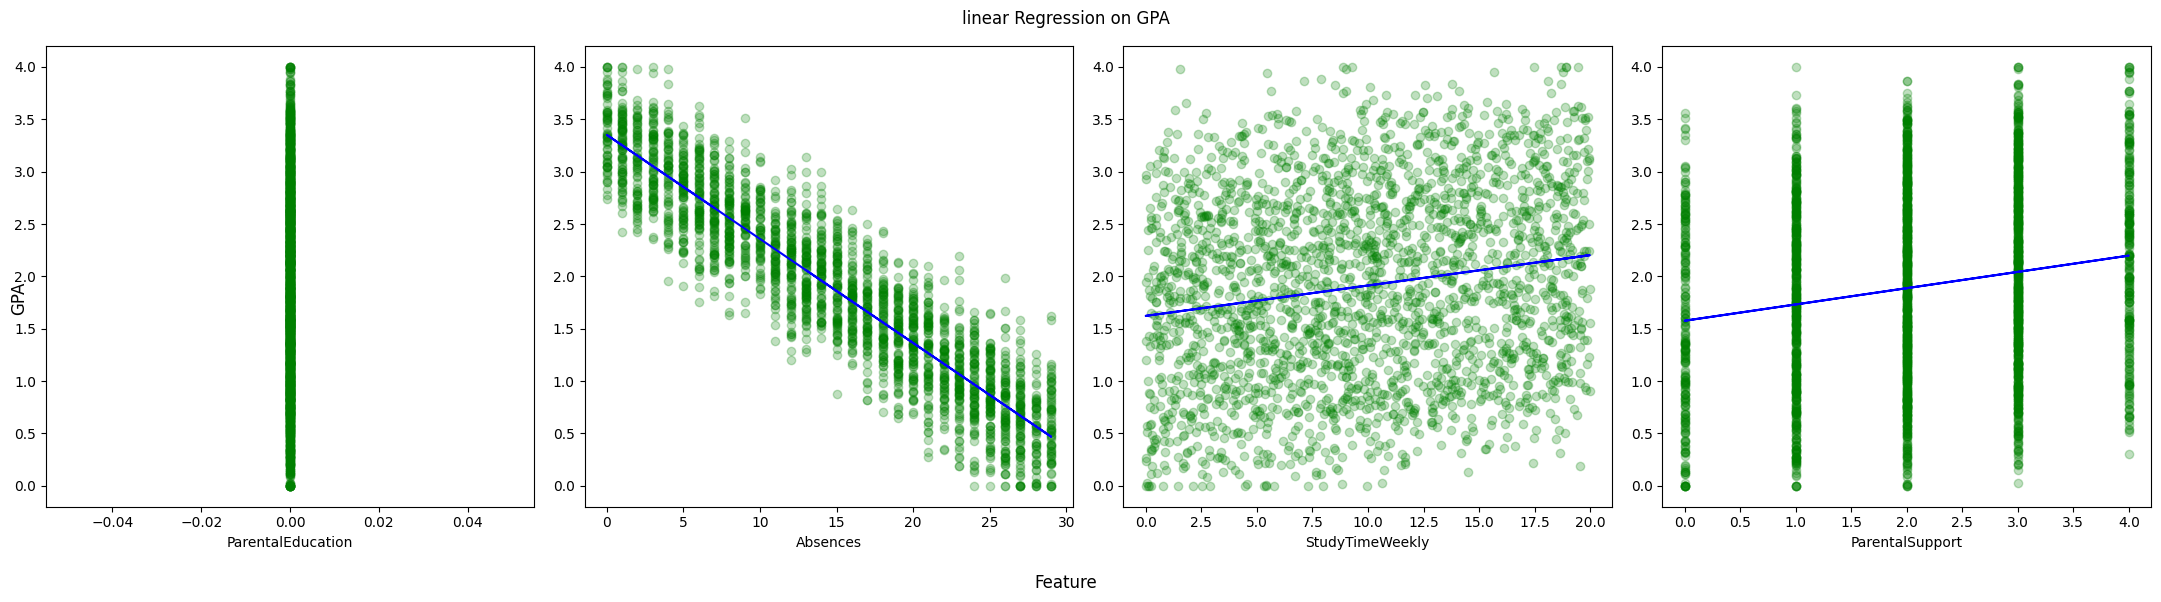

In [ ]:
X_cols = ['ParentalEducation', 'Absences', 'StudyTimeWeekly', 'ParentalSupport']

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(22, 6))
axs = ax.flatten()

for i, col in enumerate(X_cols):
    X = student_data[col] # Getting the data of individual column from original df 
    X = sm.add_constant(X)
    model = sm.OLS(student_data.GPA, X).fit()
    predictions = model.predict(X)
    
    axs[i].scatter(student_data[col], student_data.GPA, color='green', alpha=0.25)
    axs[i].plot(student_data[col], predictions, color='blue')
    axs[i].set_xlabel(col)
    
fig.supylabel("GPA") # Corrected the ylabel setting method
fig.supxlabel("Feature") # Corrected the xlabel setting method
fig.suptitle("linear Regression on GPA")

plt.tight_layout()
plt.show()

Now, let's move on to the actual random forest algorithm.

In [ ]:
# Setup the random forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, explained_variance_score, accuracy_score, confusion_matrix

# Define the features and label
y = student_data.GradeClass
X = student_data.drop(columns='GradeClass')

# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1913, 13), (479, 13), (1913,), (479,))

In [ ]:
X_train.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

For this, we will use a grid search to determine the best parameters for the model, and then use the best model for our analysis. 

In [ ]:
parameters = {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [None, 4, 8, 10, 15],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'bootstrap' : [True, False]
}


clf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=clf, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

grid_search

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 4, 8, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [81]:
X_train.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

In [ ]:
# Print the best parameters for the model
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [ ]:
grid_search.best_score_

0.9200278867578909

From the above cell outputs we can able to see that using the best parameters which we got through **GridSearchCV**, model accuracy is around **~92%**. Now let's do some accuracy analysis

In [84]:
import joblib
model = grid_search.best_estimator_

pred = model.predict(X_test)
print(classification_report(y_test, pred))
joblib.dump(model, 'student_performance_model.pkl')
print("Model saved as student_performance_model.pkl")

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        24
           1       0.74      0.80      0.77        50
           2       0.96      0.92      0.94        74
           3       0.93      0.88      0.90        96
           4       0.92      0.98      0.95       235

    accuracy                           0.91       479
   macro avg       0.91      0.82      0.85       479
weighted avg       0.91      0.91      0.91       479

Model saved as student_performance_model.pkl


In [ ]:
print(explained_variance_score(y_test, pred))

0.7821982639915954


The clearest insight we can gather from this data is that student performance is most drastically affected by the amount of absences they have. Therefore, if we are theoretical data scientists working with the school, our recommendation is intuitive. In order for this school to enhance their performance, the school should hammer down absence policies, so far as to disincentivize their students from skipping class.

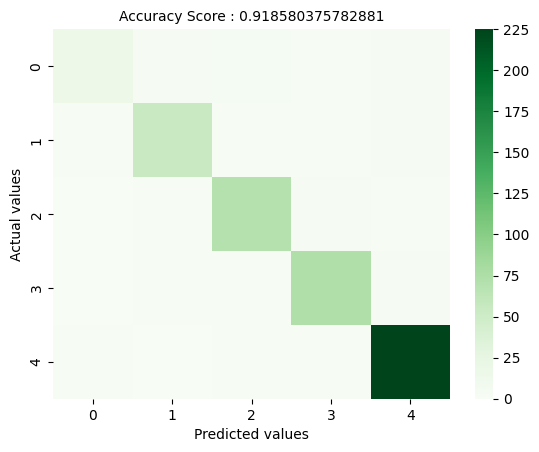

In [ ]:
score = accuracy_score(y_test, pred)
cmatrix = confusion_matrix(y_test, pred)
sns.heatmap(cmatrix, cmap='Greens')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Accuracy Score : {0}'.format(score), size=10)
plt.show()

Let's predict for the unknown values

In [ ]:
output = model.predict([[19, 1, 1, 3, 20, 4, 1, 3, 0, 1, 1, 0, 3.453]])

c:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
leGrade.inverse_transform(output)

array(['B'], dtype=object)